
# Práctica: Autovalores complejos en un sistema masa–muelle–amortiguador

En esta práctica vamos a estudiar, de forma **numérica y analítica**, un sistema clásico de la dinámica: el **sistema masa–muelle–amortiguador**.

El objetivo principal es entender cómo aparecen **autovalores reales y complejos**, y cómo estos determinan el comportamiento dinámico del sistema.

La práctica combina:
- Modelado matemático
- Álgebra lineal (autovalores)
- Integración numérica de EDOs
- Comparación entre solución analítica y numérica



## 1. Modelo físico del sistema

Consideramos una masa puntual `m` unida a un muelle de constante elástica `k` y a un amortiguador viscoso con coeficiente `c`.

Aplicando la segunda ley de Newton:

$$
m \ddot{x}(t) + c \dot{x}(t) + k x(t) = 0
$$



## 2. Sistema de primer orden

Definimos el vector de estado:

$$
\mathbf{y}(t) = (x(t), v(t))^T, \quad v = \dot{x}
$$

Entonces:

$$
\dot{\mathbf{y}} = A \mathbf{y}, \quad
A = \begin{pmatrix}
0 & 1 \\
-\frac{k}{m} & -\frac{c}{m}
\end{pmatrix}
$$



## 3. Parámetros del sistema

Modifica estos valores para explorar distintos comportamientos dinámicos.


In [ ]:

import numpy as np

# Parámetros físicos
m = 1.0   # masa
k = 10.0  # constante del muelle
c = 0.5   # coeficiente de amortiguamiento



## 4. Matriz del sistema


In [93]:

A = np.array([[0, 1],
              [-k/m, -c/m]])

A


array([[   0. ,    1. ],
       [-100. ,   -0.5]])


## 5. Autovalores del sistema


In [94]:

lambda_vals = np.linalg.eigvals(A)
lambda_vals


array([-0.25+9.99687451j, -0.25-9.99687451j])


## 6. Interpretación física

Si los autovalores son complejos conjugados:

$$
\lambda = \alpha \pm i\beta
$$

La solución es una oscilación amortiguada.


In [95]:

alpha = np.real(lambda_vals[0])
beta = np.imag(lambda_vals[0])

alpha, beta


(-0.25, 9.996874511566102)


## 7. Integración numérica


In [96]:

from scipy.integrate import solve_ivp

def sistema(t, y):
    x, v = y
    return [v, -(k/m)*x - (c/m)*v]

y0 = [1.0, 0.0]
t_eval = np.linspace(0, 10, 400)

sol = solve_ivp(sistema, (0, 10), y0, t_eval=t_eval)



## 8. Solución analítica (caso subamortiguado)


In [97]:

omega_d = np.sqrt(k/m - (c/(2*m))**2)

C1 = 1.0
C2 = c / (2*m*omega_d)

x_analitica = np.exp(-c/(2*m)*t_eval) * (
    C1 * np.cos(omega_d * t_eval)
    + C2 * np.sin(omega_d * t_eval)
)



## 9. Comparación gráfica


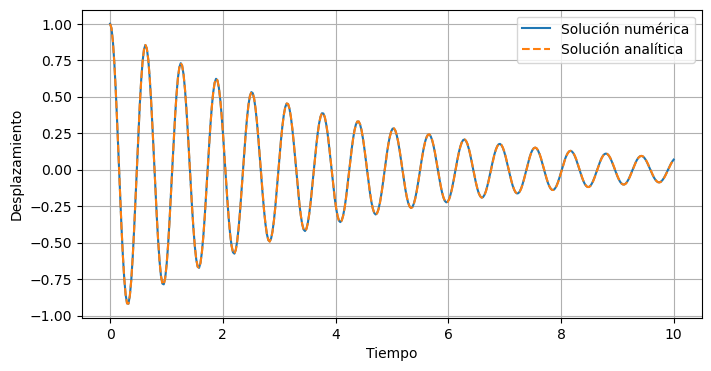

In [98]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(t_eval, sol.y[0], label='Solución numérica')
plt.plot(t_eval, x_analitica, '--', label='Solución analítica')
plt.xlabel('Tiempo')
plt.ylabel('Desplazamiento')
plt.legend()
plt.grid(True)
plt.show()



## 10. Trabajo autónomo

1. Modifica `c` y observa cuándo desaparecen las oscilaciones.
2. Estudia el efecto de aumentar `k`.
3. Comprueba cómo cambian los autovalores.
